# Detecting objects with the Single Shot Detection (SSD) model

In this recipe, you will learn how to detect objects using the **Single Shot Detection (SSD)** approach with the pretrained MobileNet network. The model supports 20 classes and can be used in many computer vision applications where finding objects in a scene is required, such as vehiclecollision warning. To know more visit https://arxiv.org/abs/1512.02325.

In this recipe, we used the SSD approach for vehicle detection, which uses MobileNet as a backbone network. The model was pretrained by the MS COCO dataset and supports a lot of generic classes, such as person, car, and bird. 

In the code, we specified the minimal level of confidence required to consider detection successful (`CONF_THR=0.3`). 

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


In [2]:
model = cv2.dnn.readNetFromCaffe('../data/MobileNetSSD_deploy.prototxt',
                                 '../data/MobileNetSSD_deploy.caffemodel')

In [3]:
CONF_THR = 0.3
LABELS = {1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
          5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
          10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
          14: 'motorbike', 15: 'person', 16: 'pottedplant',
          17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}

In [4]:
capture = cv2.VideoCapture('../data/traffic.mp4')
print(capture.isOpened())
print('Created capture:', '../data/shuttle.mp4')
print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))
# capture.get(CV_CAP_PROP_POS_FRAMES); // retrieves the current frame number

image_frames = []
image_frames_log = []

c=0
while True:
    ret, frame = capture.read()
    if not ret: 
        break
    
    current_frame = capture.get(cv2.CAP_PROP_POS_FRAMES)
    
    # grab the frame dimensions and convert it to a blob
    h, w = frame.shape[0:2]
    blob = cv2.dnn.blobFromImage(frame, 1/127.5, (300*w//h,300),(127.5,127.5,127.5), False)
    # pass the blob through the network and obtain the detections and predictions
    model.setInput(blob)
    output = model.forward()
    
    c += 1
    # loop over the detections
    for i in range(output.shape[2]):
        # extract the confidence (i.e., probability) associated with the prediction
        conf = output[0,0,i,2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if conf > CONF_THR:
            # extract the index of the class label from the
            # `detections`, then compute the (x, y)-coordinates of
            # the bounding box for the object
            label = output[0,0,i,1]
            # draw the prediction on the frame
            x0,y0,x1,y1 = (output[0,0,i,3:7] * [w,h,w,h]).astype(int)
            cv2.rectangle(frame, (x0,y0), (x1,y1), (0,255,0), 2)
            cv2.putText(frame, '{}: {:.6f}'.format(LABELS[label], conf), 
                        (x0,y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            
    
    if c == 100:
        cv2.imwrite('ch5_car_detections.png', frame)
    if c % 150 == 0 or c ==1:
        image_frames.append(["frame:{0}(1)".format(c,current_frame),frame[:,:,[2,1,0]]])
        print("current frame ==",current_frame, output.shape)
        str = "------  {0:-<25} current_frame {1}\n".format(c,current_frame)
        for raw in output[0,0,:,:]:
            if raw[1] > 0:
                str = str + "{0}  {1}({2}) ~= {3:.5f}\t\t{4:.2f} {5:.2f} {6:.2f} {7:.2f}\n".format(
                    int(raw[0]), int(raw[1]), LABELS[int(raw[1])],raw[2],raw[3],raw[4],raw[5],raw[6])
            else:
                break
        image_frames_log.append(str)
        
        
        #image_frames_log.append()
    #break
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27: 
        break
        
cv2.destroyAllWindows()

True
Created capture: ../data/shuttle.mp4
Frame count: 1501
Frame width: 1920
Frame height: 1080
Frame rate: 25.0
current frame == 1.0 (1, 1, 100, 7)
current frame == 150.0 (1, 1, 100, 7)
current frame == 300.0 (1, 1, 100, 7)
current frame == 450.0 (1, 1, 100, 7)
current frame == 600.0 (1, 1, 100, 7)
current frame == 750.0 (1, 1, 100, 7)
current frame == 900.0 (1, 1, 100, 7)
current frame == 1050.0 (1, 1, 100, 7)
current frame == 1200.0 (1, 1, 100, 7)
current frame == 1350.0 (1, 1, 100, 7)
current frame == 1500.0 (1, 1, 100, 7)


len(MobileNetSSD_deploy.caffemodel) == 11
------  1------------------------ current_frame 1.0
0  7(car) ~= 0.99870		0.46 0.27 0.57 0.43
0  7(car) ~= 0.99696		0.61 0.41 0.77 0.62
0  7(car) ~= 0.99557		0.40 0.52 0.56 0.72
0  7(car) ~= 0.99136		0.32 0.38 0.45 0.53
0  7(car) ~= 0.90819		0.25 0.28 0.36 0.43
0  7(car) ~= 0.87648		0.44 0.79 0.63 1.00
0  7(car) ~= 0.84941		0.30 0.33 0.43 0.48
0  7(car) ~= 0.44424		0.14 0.27 0.20 0.33
0  7(car) ~= 0.42940		0.28 0.30 0.39 0.45



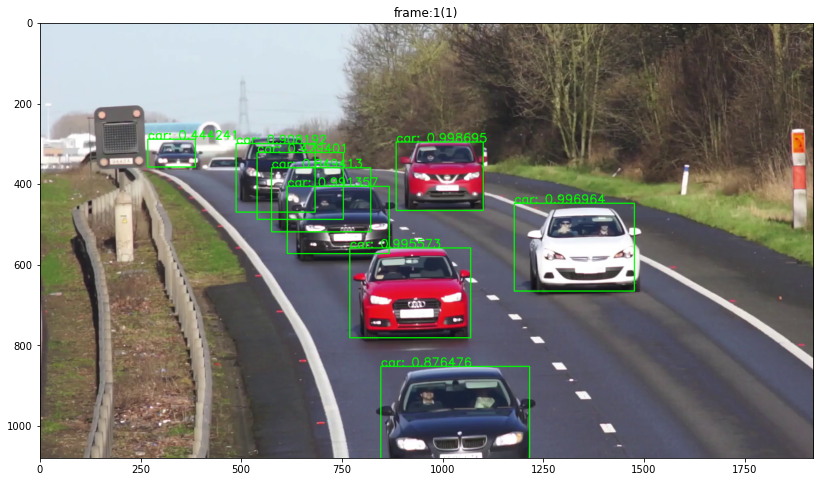

------  150---------------------- current_frame 150.0
0  7(car) ~= 0.99528		0.34 0.38 0.48 0.57
0  7(car) ~= 0.54406		0.39 0.25 0.49 0.38
0  7(car) ~= 0.51538		0.13 0.29 0.19 0.34
0  7(car) ~= 0.29735		0.26 0.29 0.31 0.34



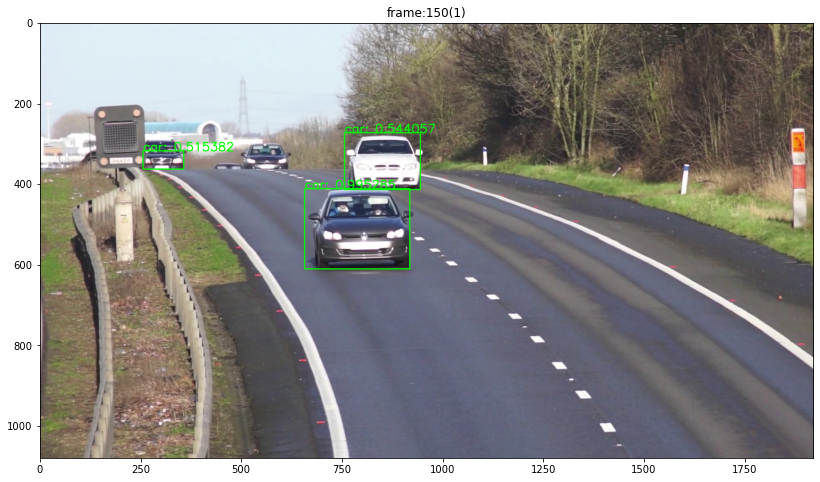

------  300---------------------- current_frame 300.0
0  7(car) ~= 0.99720		0.33 0.29 0.45 0.50
0  7(car) ~= 0.96497		0.44 0.27 0.55 0.41
0  7(car) ~= 0.50759		0.35 0.22 0.45 0.34



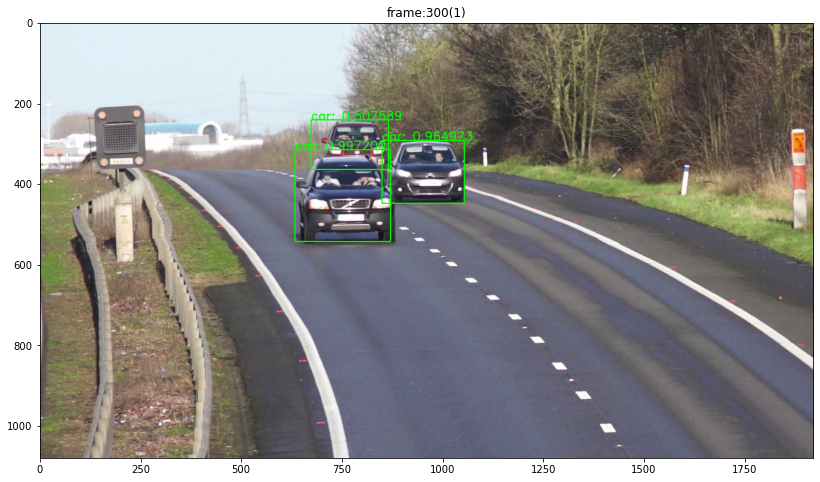

------  450---------------------- current_frame 450.0
0  7(car) ~= 0.29029		0.25 0.29 0.30 0.34
0  7(car) ~= 0.25855		0.33 0.25 0.40 0.34



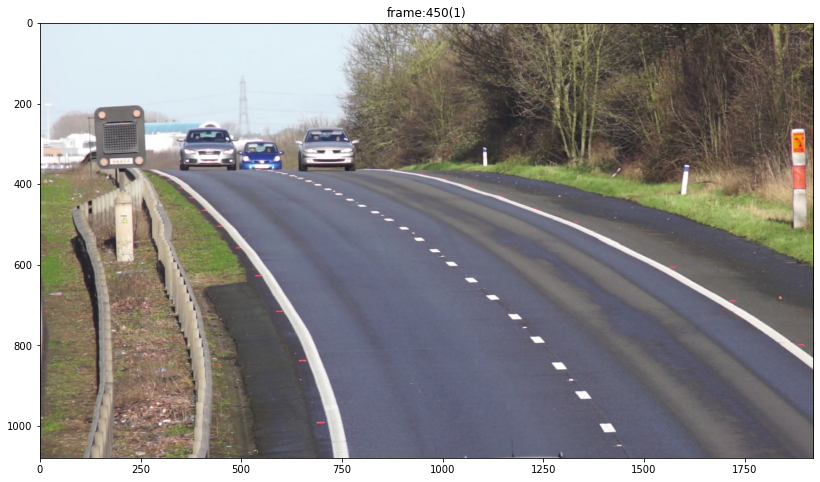

------  600---------------------- current_frame 600.0
0  7(car) ~= 0.99776		0.46 0.30 0.57 0.45
0  7(car) ~= 0.99044		0.70 0.54 0.85 0.76
0  7(car) ~= 0.69896		0.61 0.79 0.82 1.00
0  7(car) ~= 0.52535		0.13 0.25 0.20 0.34
0  7(car) ~= 0.41556		0.27 0.27 0.35 0.33



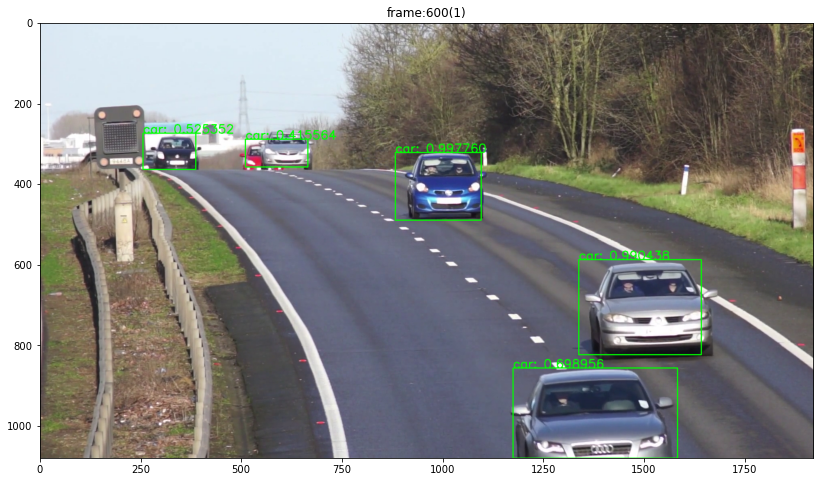

------  750---------------------- current_frame 750.0
0  7(car) ~= 0.99843		0.49 0.30 0.60 0.45
0  7(car) ~= 0.97852		0.25 0.28 0.38 0.45
0  7(car) ~= 0.57994		0.14 0.27 0.20 0.33
0  7(car) ~= 0.48735		0.40 0.24 0.49 0.37



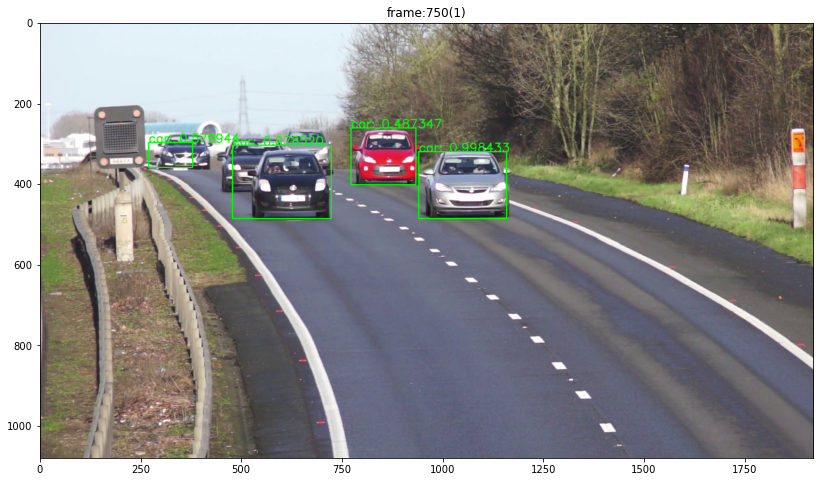

------  900---------------------- current_frame 900.0
0  7(car) ~= 0.99990		0.84 0.66 1.00 0.92
0  7(car) ~= 0.99867		0.29 0.31 0.41 0.49
0  7(car) ~= 0.99862		0.54 0.34 0.66 0.51
0  7(car) ~= 0.86920		0.33 0.19 0.41 0.34



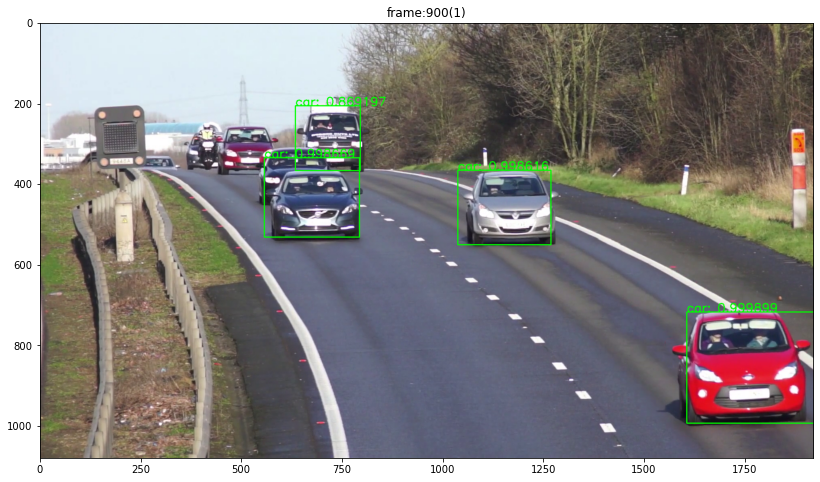

------  1050--------------------- current_frame 1050.0
0  7(car) ~= 0.99767		0.32 0.39 0.45 0.56
0  7(car) ~= 0.98924		0.59 0.28 0.75 0.55
0  7(car) ~= 0.91421		0.72 0.53 0.87 0.76
0  7(car) ~= 0.47162		0.24 0.27 0.34 0.38
0  7(car) ~= 0.41864		0.37 0.22 0.45 0.35
0  14(motorbike) ~= 0.90298		0.44 0.53 0.52 0.73
0  15(person) ~= 0.40640		0.44 0.52 0.52 0.72



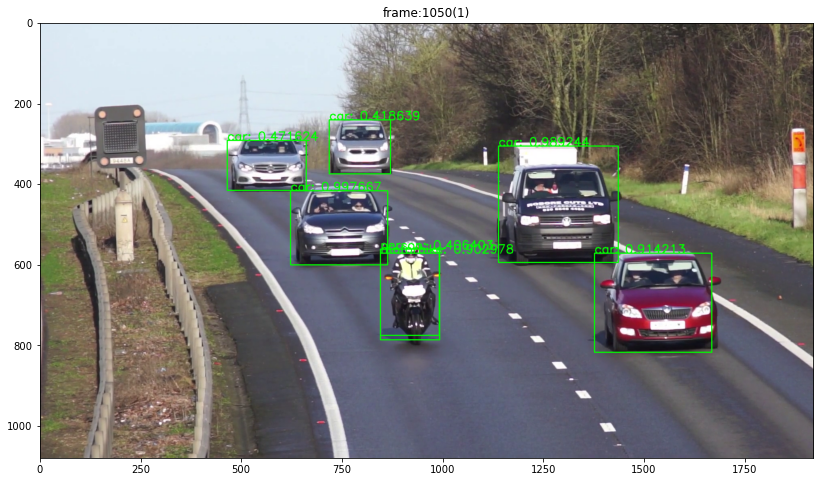

------  1200--------------------- current_frame 1200.0
0  7(car) ~= 0.99887		0.36 0.36 0.48 0.54
0  7(car) ~= 0.99595		0.76 0.50 0.92 0.75
0  7(car) ~= 0.27321		0.32 0.23 0.40 0.34



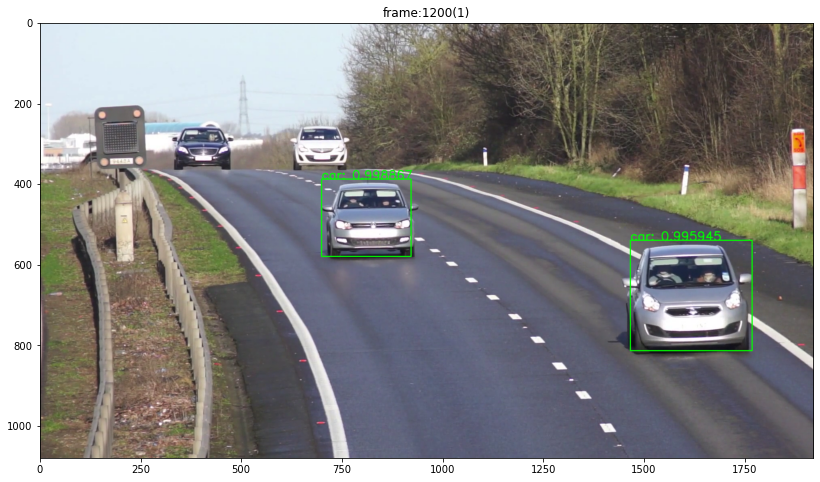

------  1350--------------------- current_frame 1350.0
0  7(car) ~= 0.99999		0.45 0.64 0.65 0.93
0  7(car) ~= 0.99476		0.68 0.46 0.83 0.68
0  7(car) ~= 0.95048		0.16 0.24 0.28 0.35
0  7(car) ~= 0.33287		0.15 0.28 0.19 0.34



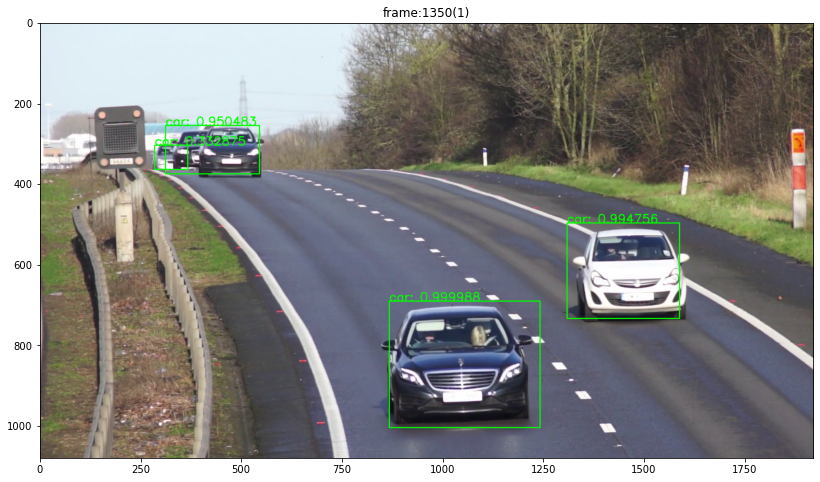

------  1500--------------------- current_frame 1500.0
0  7(car) ~= 0.99979		0.49 0.32 0.61 0.50
0  7(car) ~= 0.95575		0.45 0.55 0.61 0.79
0  7(car) ~= 0.73194		0.31 0.23 0.43 0.35
0  7(car) ~= 0.49118		0.19 0.23 0.27 0.36



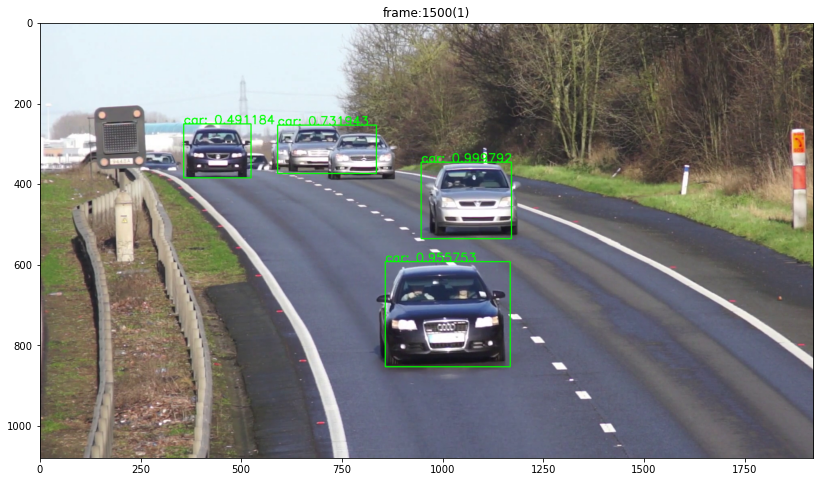

In [5]:
#########################################################
print("len(MobileNetSSD_deploy.caffemodel) ==", len(image_frames))
k =1
for i in range(0,len(image_frames),k):
    for j in image_frames_log[i:i+k]:
        s = j
        print(s)
    plt_view_image(plt,image_frames[i:i+k], figsize=(15,8), axis='on', cmap='gray')